<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Feature_selection_with_Random_Forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/

In [22]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/NP_exo.csv')
df = df.set_index("Date") # define Date  as index
df.shape

(52416, 7)

In [24]:
X=df.iloc[:, 1:7]
y=df.iloc[:, 0]

In [25]:
X_train = X[:-17472]; X_test = X[-17472:]
y_train = y[:-17472]; y_test = y[-17472:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34944, 6), (34944,), (17472, 6), (17472,))

In [26]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [27]:
features = list(X.columns.values)

In [28]:
rf.feature_importances_

array([0.35938061, 0.15634858, 0.10550911, 0.11901334, 0.1373552 ,
       0.12239316])

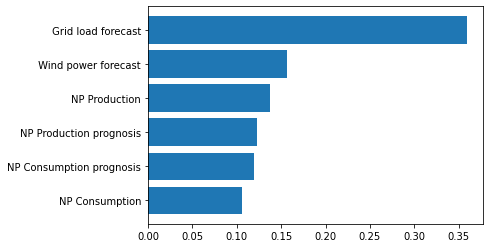

In [29]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [31]:
#option1 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1))
fit = rfe.fit(X, y)

In [ ]:
#option 2
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_mean_squared_error')

In [32]:
selected_features = np.array(features)[rfe.get_support()]

In [33]:
rfe.get_support()

array([ True, False, False, False,  True,  True])